# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [7]:
sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0
...,...,...,...
27023,Vilhena,32,35.0
27024,Chupinguaia,19,NaN
27025,Vilhena,24,30.0
27026,Vilhena,21,24.0


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [8]:
sinasc_raw.DTNASC = pd.to_datetime(sinasc_raw.DTNASC)
sinasc_raw.DTNASC

0       2019-02-19
1       2019-02-21
2       2019-02-25
3       2019-03-20
4       2019-03-23
           ...    
27023   2019-12-13
27024   2019-10-04
27025   2019-08-02
27026   2019-12-23
27027   2019-12-27
Name: DTNASC, Length: 27028, dtype: datetime64[ns]

In [9]:
sinasc_aniversario = sinasc_raw[(sinasc_raw.DTNASC.dt.day == 3) & (sinasc_raw.DTNASC.dt.month == 11)]

sinasc_aniversario = sinasc_aniversario.groupby(by=['DTNASC', 'SEXO', 'ESCMAE'])['PESO'].mean()

sinasc_aniversario

DTNASC      SEXO       ESCMAE         
2019-11-03  Feminino   12 anos ou mais    3090.333333
                       4 a 7 anos         3480.833333
                       8 a 11 anos        3139.800000
            Masculino  1 a 3 anos         3640.000000
                       12 anos ou mais    3168.750000
                       4 a 7 anos         2010.000000
                       8 a 11 anos        3369.545455
Name: PESO, dtype: float64

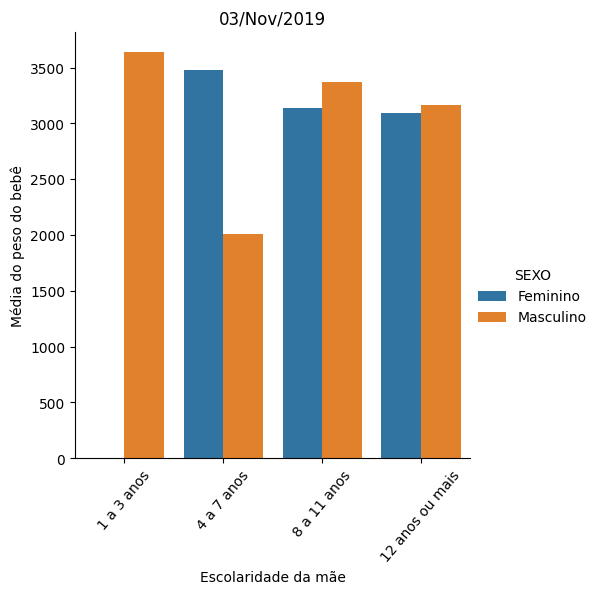

In [10]:
data = sinasc_aniversario.index.get_level_values(level=0).unique()[0].date()

sns.catplot(x='ESCMAE',
            y='PESO',
            data=sinasc_aniversario.reset_index(level='DTNASC',
                                                drop=True).reset_index(),
            hue='SEXO',
            kind='bar',
            order=['1 a 3 anos',
                   '4 a 7 anos',
                   '8 a 11 anos',
                   '12 anos ou mais'])
plt.xticks(rotation=50)
plt.xlabel(xlabel='Escolaridade da mãe')
plt.ylabel(ylabel='Média do peso do bebê')
plt.title(label=data.strftime('%d/%b/%Y'));

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [11]:
municipios = sinasc_raw.groupby(['munResNome'])
municipios.agg({'IDADEMAE':[('média','mean'),('mínima','min'),( 'máxima','max')], 'IDADEPAI':[('média','mean'),('mínima','min'),( 'máxima','max')]})

IDADEMAE                 IDADEPAI              
                               média mínima máxima      média mínima máxima
munResNome                                                                 
Alta Floresta D'Oeste      25.991826     14     53  29.548701   17.0   58.0
Alto Alegre dos Parecis    24.844156     14     41  29.179104   16.0   50.0
Alto Paraíso               24.960177     11     42  28.833333   21.0   49.0
Alvorada D'Oeste           25.770732     15     44  30.757282   17.0   52.0
Ariquemes                  25.607866     13     44  32.466667   20.0   51.0
Buritis                    25.559177     14     44  30.812500   18.0   49.0
Cabixi                     26.037500     13     39  34.333333   19.0   47.0
Cacaulândia                25.546667     16     42  36.333333   28.0   50.0
Cacoal                     26.890102     14     47  30.931854   17.0   66.0
Campo Novo de Rondônia     24.825301     13     40  30.500000   21.0   40.0
Candeias do Jamari         25.243323     14     45  29.894737   21.0   41.0
Castanheiras               27.281250     17     39  30.392857   17.0   43.0
Cerejeiras                 27.240506     15     53  31.652778   19.0   52.0
Chupinguaia                25.333333     13     42  29.629630   20.0   46.0
Colorado do Oeste          27.602804     15     47  34.354839   23.0   53.0
Corumbiara                 24.716535     15     43  32.470588   21.0   52.0
Costa Marques              24.412017     12     41  30.613636   17.0   60.0
Cujubim                    24.482927     14     42  31.400000   19.0   44.0
Espigão D'Oeste            26.093333     14     44  31.198113   16.0   86.0
Governador Jorge Teixeira  24.401786     13     41  29.222222   22.0   37.0
Guajará-Mirim              25.462228     13     43  30.470588   19.0   44.0
Itapuã do Oeste            26.064220     15     46  42.500000   25.0   73.0
Jaru                       25.982974     12     45  32.197183   19.0   62.0
Ji-Paraná                  26.361137     12     44  31.132239   15.0   63.0
Machadinho D'Oeste         25.480000     13     44  31.326923   17.0   53.0
Ministro Andreazza         27.904762     17     44  33.849315   21.0   55.0
Mirante da Serra           26.304878     14     46  32.154762   20.0   56.0
Monte Negro                25.648241     14     40  34.678571   20.0   55.0
Município ignorado - RO    24.000000     24     24  22.000000   22.0   22.0
Nova Brasilândia D'Oeste   26.222222     15     51  30.520833   20.0   48.0
Nova Mamoré                25.326389     14     46  31.692308   19.0   43.0
Nova União                 26.894231     16     39  31.371429   18.0   53.0
Novo Horizonte do Oeste    26.938776     15     41  31.588235   20.0   56.0
Ouro Preto do Oeste        26.375594     14     44  31.233244   17.0   60.0
Parecis                    26.454545     16     41  32.473684   18.0   61.0
Pimenta Bueno              25.199675     13     47  29.745174   16.0   70.0
Pimenteiras do Oeste       25.075000     14     40  35.600000   25.0   45.0
Porto Velho                26.312670     12     47  32.352679   16.0   65.0
Presidente Médici          25.796053     14     44  30.150754   16.0   64.0
Primavera de Rondônia      27.023256     16     39  31.888889   21.0   44.0
Rio Crespo                 26.660000     16     39  28.000000   28.0   28.0
Rolim de Moura             26.600863     14     44  30.360479   16.0   69.0
Santa Luzia D'Oeste        26.121212     15     41  30.703297   18.0   53.0
Seringueiras               24.910714     14     42  30.500000   20.0   47.0
São Felipe D'Oeste         26.481481     17     41  31.395833   18.0   57.0
São Francisco do Guaporé   25.660066     14     41  31.638889   19.0   54.0
São Miguel do Guaporé      25.926346     14     42  32.666667   19.0   60.0
Teixeirópolis              26.031250     16     39  31.500000   20.0   67.0
Theobroma                  25.536082     15     42  30.083333   23.0   45.0
Urupá                      26.688235     15     43  31.008929   17.0   48.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [12]:
sinasc_marco = sinasc_raw[sinasc_raw.DTNASC.dt.month == 3].copy()
sinasc_marco.groupby('munResNome').aggregate({'QTDFILVIVO': 'sum'}).sort_values('QTDFILVIVO', ascending= False)


,QTDFILVIVO
munResNome,
Porto Velho,812.0
Ji-Paraná,155.0
Ariquemes,148.0
Vilhena,144.0
Cacoal,128.0
Guajará-Mirim,112.0
Jaru,80.0
Ouro Preto do Oeste,68.0
Nova Mamoré,68.0


In [13]:
pd.pivot_table(sinasc_raw,index = ['munResNome'], columns=['IDADEPAI'], aggfunc= {'IDADEPAI': ['max', 'min', 'mean']})


IDADEPAI                                            \
                               max                                             
IDADEPAI                      15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   
munResNome                                                                     
Alta Floresta D'Oeste          NaN   NaN  17.0  18.0  19.0  20.0  21.0  22.0   
Alto Alegre dos Parecis        NaN  16.0   NaN  18.0  19.0  20.0  21.0  22.0   
Alto Paraíso                   NaN   NaN   NaN   NaN   NaN   NaN  21.0   NaN   
Alvorada D'Oeste               NaN   NaN  17.0  18.0  19.0  20.0  21.0  22.0   
Ariquemes                      NaN   NaN   NaN   NaN   NaN  20.0   NaN   NaN   
Buritis                        NaN   NaN   NaN  18.0  19.0  20.0  21.0   NaN   
Cabixi                         NaN   NaN   NaN   NaN  19.0   NaN   NaN   NaN   
Cacaulândia                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cacoal                         NaN   NaN  17.0  18.0  19.0  20.0  21.0  22.0   
Campo Novo de Rondônia         NaN   NaN   NaN   NaN   NaN   NaN  21.0  22.0   
Candeias do Jamari             NaN   NaN   NaN   NaN   NaN   NaN  21.0  22.0   
Castanheiras                   NaN   NaN  17.0   NaN  19.0  20.0   NaN   NaN   
Cerejeiras                     NaN   NaN   NaN   NaN  19.0   NaN  21.0  22.0   
Chupinguaia                    NaN   NaN   NaN   NaN   NaN  20.0  21.0  22.0   
Colorado do Oeste              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Corumbiara                     NaN   NaN   NaN   NaN   NaN   NaN  21.0   NaN   
Costa Marques                  NaN   NaN  17.0   NaN  19.0  20.0   NaN  22.0   
Cujubim                        NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN   
Espigão D'Oeste                NaN  16.0  17.0  18.0  19.0  20.0  21.0  22.0   
Governador Jorge Teixeira      NaN   NaN   NaN   NaN   NaN   NaN   NaN  22.0   
Guajará-Mirim                  NaN   NaN   NaN   NaN  19.0  20.0  21.0   NaN   
Itapuã do Oeste                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Jaru                           NaN   NaN   NaN   NaN  19.0  20.0  21.0  22.0   
Ji-Paraná                     15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0   
Machadinho D'Oeste             NaN   NaN  17.0  18.0  19.0  20.0  21.0  22.0   
Ministro Andreazza             NaN   NaN   NaN   NaN   NaN   NaN  21.0  22.0   
Mirante da Serra               NaN   NaN   NaN   NaN   NaN  20.0  21.0  22.0   
Monte Negro                    NaN   NaN   NaN   NaN   NaN  20.0   NaN  22.0   
Município ignorado - RO        NaN   NaN   NaN   NaN   NaN   NaN   NaN  22.0   
Nova Brasilândia D'Oeste       NaN   NaN   NaN   NaN   NaN  20.0  21.0  22.0   
Nova Mamoré                    NaN   NaN   NaN   NaN  19.0  20.0   NaN   NaN   
Nova União                     NaN   NaN   NaN  18.0   NaN  20.0  21.0  22.0   
Novo Horizonte do Oeste        NaN   NaN   NaN   NaN   NaN  20.0   NaN  22.0   
Ouro Preto do Oeste            NaN   NaN  17.0  18.0  19.0  20.0  21.0  22.0   
Parecis                        NaN   NaN   NaN  18.0  19.0   NaN  21.0  22.0   
Pimenta Bueno                  NaN  16.0  17.0  18.0  19.0  20.0  21.0  22.0   
Pimenteiras do Oeste           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Porto Velho                    NaN  16.0  17.0  18.0  19.0  20.0  21.0  22.0   
Presidente Médici              NaN  16.0  17.0  18.0  19.0  20.0  21.0  22.0   
Primavera de Rondônia          NaN   NaN   NaN   NaN   NaN   NaN  21.0  22.0   
Rio Crespo                     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Rolim de Moura                 NaN  16.0  17.0  18.0  19.0  20.0  21.0  22.0   
Santa Luzia D'Oeste            NaN   NaN   NaN  18.0  19.0  20.0  21.0   NaN   
Seringueiras                   NaN   NaN   NaN   NaN   NaN  20.0  21.0  22.0   
São Felipe D'Oeste             NaN   NaN   NaN  18.0  19.0  20.0  21.0   NaN   
São Francisco do Guaporé       NaN   NaN   NaN   NaN  19.0   NaN   NaN   NaN   
São Miguel do Guaporé     

Explorando de outra forma:


In [16]:
sinasc_4 = sinasc_raw[['munResNome', 'QTDFILVIVO', 'IDADEPAI']]
sinasc_4['mês'] = sinasc_raw['DTNASC'].apply(lambda i:i.month)
sinasc_4.head()

<ipython-input-16-2299936ed07a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_4['mês'] = sinasc_raw['DTNASC'].apply(lambda i:i.month)


,munResNome,QTDFILVIVO,IDADEPAI,mês
0,Alta Floresta D'Oeste,0.0,26.0,2
1,Alta Floresta D'Oeste,1.0,24.0,2
2,Alta Floresta D'Oeste,2.0,32.0,2
3,Alto Alegre dos Parecis,0.0,24.0,3
4,Alta Floresta D'Oeste,1.0,27.0,3


In [18]:
# descobrindo qual município mais nasceu bebe no mês de março
sinasc_4[sinasc_4['mês']==3].groupby('munResNome')['QTDFILVIVO'].count().sort_values(ascending=False)[:1]

munResNome
Porto Velho    627
Name: QTDFILVIVO, dtype: int64

In [20]:
# Descobrindo quais as idades media, maxima, minima do município de Porto Velho
sinasc_4[sinasc_4['munResNome']=='Porto Velho'].groupby('munResNome')['QTDFILVIVO','IDADEPAI'].aggregate(['mean',max,min])

<ipython-input-20-f02ebd844913>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_4[sinasc_4['munResNome']=='Porto Velho'].groupby('munResNome')['QTDFILVIVO','IDADEPAI'].aggregate(['mean',max,min])


QTDFILVIVO              IDADEPAI            
                  mean   max  min       mean   max   min
munResNome                                              
Porto Velho   1.167236  12.0  0.0  32.352679  65.0  16.0

Pode-se concluir que a idade mínima em Porto Velho dos pais são 16 anos e máxima 65 anos, bem como a média, 40 anos.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Alguns insights extraídos da análise acima:



*   Aparentemente o peso do bebê não tem relação com o nível de
escolaridade do filho.
*   Também não existe um padrão exato quanto à idade do pai e da mãe, ou
seja, ainda  a maioria dos pais são mais velhos que a mãe, porém não pode-se considerar um padrão.
*   Por uma pesquisa breve em relação do IDH dos municipios de Rondônia, pode-se dizer que o município de POrto Velho não apenas apresente a maior quantidade de filhos vivos como também o maior IDH do Estado, o que necessitaria de uma avaliação mais precisa porém uma variante relevante.















Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [ ]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [ ]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [ ]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')